In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [59]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [60]:
# Data Preprocessing and Selection
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [61]:
# converting the target variable i.e. churn from float to integer
df['churn'] = df['churn'].astype(int)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [62]:
print(f'There are total {df.shape[0]} observations.')
print(f'There are total {df.shape[1]} variables.')

There are total 200 observations.
There are total 10 variables.


In [63]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']].values
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [64]:
y = df['churn'].values
y[0:5]

array([1, 1, 0, 0, 0])

In [65]:
# since for algorithms like logistic regression and SVM are sensitive to scaled
# we need to scale the data so that they have mean = 0 and standard deviation of 1
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [66]:
# Test/Train Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(f'Train set: {X_train.shape}, {y_train.shape}.')
print(f'Test set: {X_test.shape}, {y_test.shape}.')

Train set: (160, 9), (160,).
Test set: (40, 9), (40,).


In [67]:
# Modeling
# I am using regularization technique to penalize the coefficient to prevent the model from overfitting
# this helps the model to generalize better to unseen data by preventing it to assign very large coefficients(weights) to features
# less regularization attribute C means stronger regularization
# solver attribute here is the algorithm that is used to minimize the cost function
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [68]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [69]:
# using predict_proba() to compute probability for each class (churn = 1 or churn = 0)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

In [70]:
# Evalutaion
# using jaccard index to compute the similarity between two set which will give us the accuracy of our model
# since the positive class is 0, we need to use the attribute pos_label = 0, the default is positive label = 1
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

np.float64(0.5625)

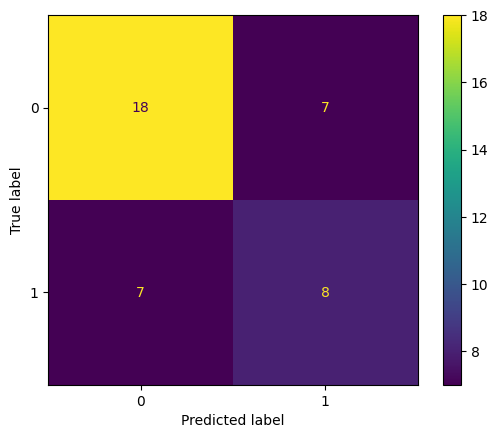

In [71]:
# analyzing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [73]:
# uses yhat_prob to check against out y_test and penalizes each prediction 
# that predicted wrong value with higher confidence and rewards confidence + correct prediction
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6155809757244557

In [74]:
# trying different solver and regularization values in our logistic regression model
LR = LogisticRegression(solver='lbfgs', C=0.1).fit(X_train, y_train)
LR

LogisticRegression(C=0.1)

In [75]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [76]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.84841207, 0.15158793],
       [0.78663793, 0.21336207],
       [0.70046786, 0.29953214],
       [0.93513508, 0.06486492],
       [0.73111129, 0.26888871],
       [0.8381054 , 0.1618946 ],
       [0.6827951 , 0.3172049 ],
       [0.76527782, 0.23472218],
       [0.37754807, 0.62245193],
       [0.83519629, 0.16480371],
       [0.74862812, 0.25137188],
       [0.78313855, 0.21686145],
       [0.74828881, 0.25171119],
       [0.41644317, 0.58355683],
       [0.92875661, 0.07124339],
       [0.58372189, 0.41627811],
       [0.63502171, 0.36497829],
       [0.59270518, 0.40729482],
       [0.59658892, 0.40341108],
       [0.85370616, 0.14629384],
       [0.59560163, 0.40439837],
       [0.61600108, 0.38399892],
       [0.94219152, 0.05780848],
       [0.59433613, 0.40566387],
       [0.5477405 , 0.4522595 ],
       [0.96612574, 0.03387426],
       [0.35318533, 0.64681467],
       [0.59610773, 0.40389227],
       [0.63698399, 0.36301601],
       [0.97004263, 0.02995737],
       [0.

In [77]:
y_test, yhat

(array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

In [78]:
log_loss(y_test, yhat_prob) # higher log_loss than previous model

0.6567194708924844

In [79]:
# calculating logloss by removing the equip vector
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless', 'churn']]
df.head()

,tenure,age,address,income,ed,employ,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,1.0,0.0,0


In [80]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless']])
y = np.asarray(df['churn'])

In [81]:
X_normalize = preprocessing.StandardScaler().fit_transform(X)
X_normalize[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472,  0.64686916, -0.63910148]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=4)

In [83]:
LR = LogisticRegression().fit(X_train, y_train)

In [84]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [85]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob[:10]

array([[0.94497933, 0.05502067],
       [0.7103777 , 0.2896223 ],
       [0.61672203, 0.38327797],
       [0.95148833, 0.04851167],
       [0.65291702, 0.34708298],
       [0.86774053, 0.13225947],
       [0.54735084, 0.45264916],
       [0.6494215 , 0.3505785 ],
       [0.42106951, 0.57893049],
       [0.75651226, 0.24348774]])

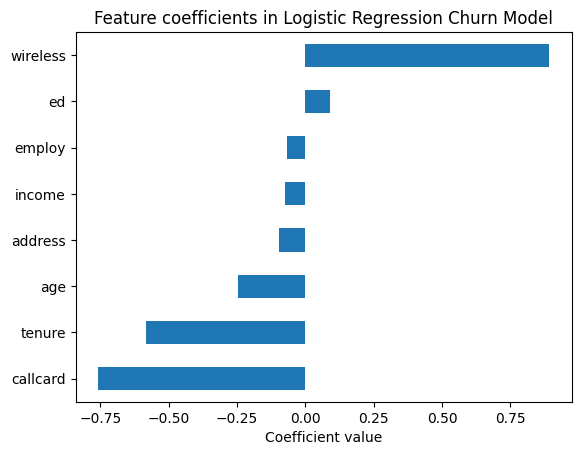

In [86]:
# converting the weights i.e. coef of LR into pandas series which allows us to attach labels with the coef of LR
# the coef of LR is 2D array with just the weights so in order to select the weights we need to use LR.coef_[0]
# selecting the column names from the df we created without the equip vector
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1])
# sorting the values and plot a horizontal bar graph
coefficients.sort_values().plot(kind='barh')
plt.title('Feature coefficients in Logistic Regression Churn Model')
plt.xlabel('Coefficient value')
plt.show()

In [87]:
log_loss(y_pred, y_pred_prob)

0.28013298910821616